In [8]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

%matplotlib inline
d2l.use_svg_display()

In [ ]:
# 通过ToTensor实例将图像数据从PIL类型转换为float32
# 并除以255归一化

trans = transforms.ToTensor()
# 下载数据集
mnist_train = torchvision.datasets.FashionMNIST(root= ".//data", train= True, transform= trans, download= True) # 训练集
mnist_test = torchvision.datasets.FashionMNIST(root= ".//data", train= False, transform= trans, download= True) # 测试集

In [10]:
def get_fashion_mnist_labels(labels):
    '''返回Fashion_MNIST数据集的文本标签
    在数字索引及其文本名称之间进行转换'''

    text_labels = ["t-shirt", 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

    '''
    return这行等价于:    
    result = []
    for i in labels:          # 遍历输入列表中的每个标签
    index = int(i)        # 将标签转为整数（确保索引是整型）
    text = text_labels[index]  # 根据索引从文本标签列表中取值
    result.append(text)   # 将文本标签添加到结果列表
    return result'''

def show_images(imgs, num_rows, num_cols, titles= None, scale= 1.5):
    '''Plot a list of images'''

    figsize = (num_cols * scale, num_rows)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize) # _是忽略第一个返回值，axes是一个包含所有子图的二维数组
    axes = axes.flatten() # 将axes展平
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 如果是图片张量，先转换再显示
            ax.imshow(img.numpy())
        else:
            # 如果是PIL图片，直接显示
            ax.imshow(img)

        # 隐藏坐标轴
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

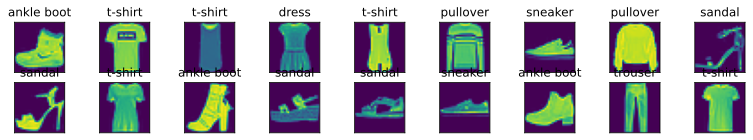

In [11]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [12]:
batch_size = 256

def get_dataloader_workers():
    '''使用4个进程来读取数据'''
    return 4

train_iter =data.DataLoader(mnist_train, batch_size, shuffle= True, num_workers= get_dataloader_workers())

In [ ]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root=".//data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root=".//data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))